# Simple Linear Regression

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#reading_data">Reading the Data</a></li>
        <li><a href="#exploratory_data_analysis">Exploratory Data Analysis</a></li>
        <li><a href="#simple_linear_regression_model">Simple Linear Regression Model</a></li>
        <li><a href="#predictions">Predictions</a></li>
         <li><a href="#references">References</a></li>
    </ol>
</div>
<br>
<hr>

## Data Source
A salary dataset, **`Salary_Data.csv`**, is downloaded ferom Kaggle.  [Dataset source](https://www.kaggle.com/dcw8161/salary-data-sl-regression/data)


## 1. Reading the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'C:\Users\Chad\Documents\Projects\Lenear_Regression\Salary_Data.csv')

In [4]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## 2. Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [6]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


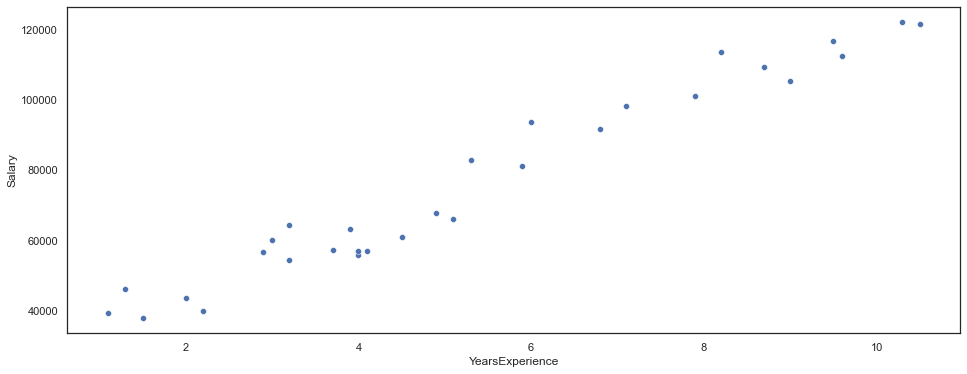

In [7]:
plt.figure(figsize=(16,6))
corr = df.corr
sns.set_theme(style = 'white')
heat_map = sns.scatterplot(x = df['YearsExperience'], y = df['Salary'])

## 3. Simple Linear Regression Model

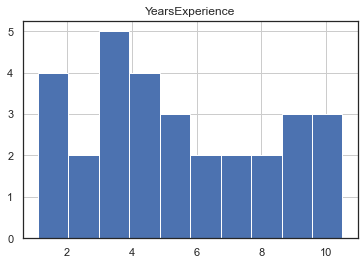

In [8]:
plot = df[['YearsExperience']]
plot.hist()
plt.show()

In [9]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

In [10]:
print('train_shape:', train.shape)
print('test_shape:',test.shape)


train_shape: (24, 2)
test_shape: (6, 2)


In [11]:
Results = pd.DataFrame({'Algorithm': [],'MAE': [], 'R^2': [], "MSE":[], "RMSE":[]})

In [12]:
from sklearn.linear_model import LinearRegression
model_1 = LinearRegression()
X_train = np.asanyarray(train[['YearsExperience']])
y_train = np.asanyarray(train[['Salary']])
model_1.fit (X_train, y_train)
# The coefficients
print ('Coefficients: ', model_1.coef_)
print ('Intercept: ',model_1.intercept_)

Coefficients:  [[9383.82018777]]
Intercept:  [27046.79748445]


## 4. Predictions

Text(0.5, 1.0, 'Train Data')

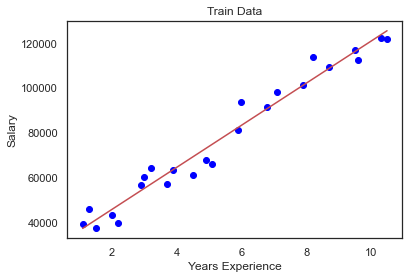

In [13]:
plt.scatter(train['YearsExperience'],train['Salary'],  color='blue')
plt.plot(X_train, model_1.coef_[0][0]*X_train + model_1.intercept_[0], '-r')
plt.xlabel("Years Experience")
plt.ylabel("Salary")
plt.title("Train Data")

In [14]:
X_test = np.asanyarray(test[['YearsExperience']])
y_test = np.asanyarray(test[['Salary']])
preds_1= model_1.predict(X_test)

In [15]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from math import sqrt

In [16]:
res = pd.DataFrame({'Algorithm': ['LinearRegression'],'MAE': [mean_absolute_error(y_test, preds_1)],"R^2": [r2_score(y_test, preds_1)], "MSE":[mean_squared_error(y_test, preds_1)], "RMSE":[sqrt(mean_squared_error(y_test, preds_1))]})
Results = Results.append(res)

In [17]:
Results

,Algorithm,MAE,R^2,MSE,RMSE
0,LinearRegression,6618.128918,0.869527,4.805467e+07,6932.147488


Text(0.5, 1.0, 'Test Data')

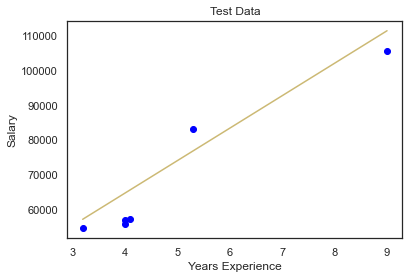

In [18]:
plt.scatter(test['YearsExperience'], test['Salary'],  color='blue')
plt.plot(X_test, model_1.coef_[0][0]*X_test + model_1.intercept_[0], '-y')
plt.xlabel("Years Experience")
plt.ylabel("Salary")
plt.title("Test Data")

## 5. References

[Reference](https://www.coursera.org/learn/machine-learning-with-python/home/welcome)